In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
file_path = '../data/original.xlsx' 
df = pd.read_excel(file_path)

In [4]:
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['ans']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [7]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [8]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 34.131601505755405
R^2 Score: 0.3730015287568529


In [9]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"Cross-validated R^2 Score: {cv_scores.mean()}")

Cross-validated R^2 Score: -12.12161465740596


In [10]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

    Actual  Predicted
27   61.28  56.268435
15   71.20  74.159942
23   67.51  70.111116
17   49.59  60.766689
8    52.30  52.219609
9    58.10  56.717863
28   63.65  56.268435
24   62.88  56.268435
12   49.25  55.692526


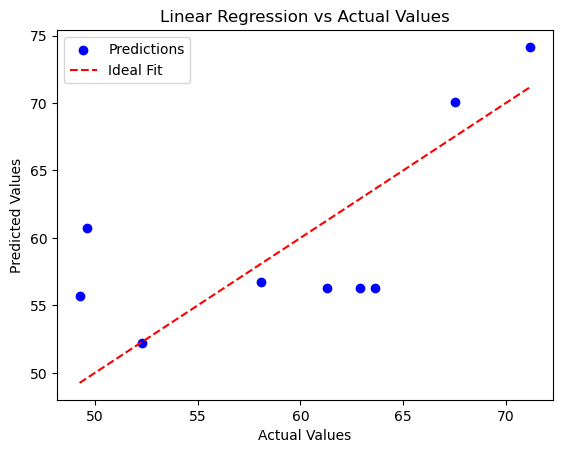

In [11]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression vs Actual Values')
plt.legend()
plt.show()